In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy import ndimage, misc
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np

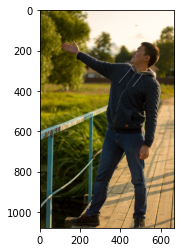

In [4]:
pix4 = np.array(Image.open('Data/Sanya.jpg'))
ax = plt.subplot()
ax.imshow(pix4);

db=KMeans(n_clusters=80)
#db=DBSCAN(eps=4, min_samples=3, n_jobs=4)

In [5]:
%%time
data = [(x, y, pix4[x, y][0], pix4[x, y][1], pix4[x, y][2]) for x in range(pix4.shape[0]) for y in range(pix4.shape[1])]
db_clusters=db.fit_predict(data)

Wall time: 4min 26s


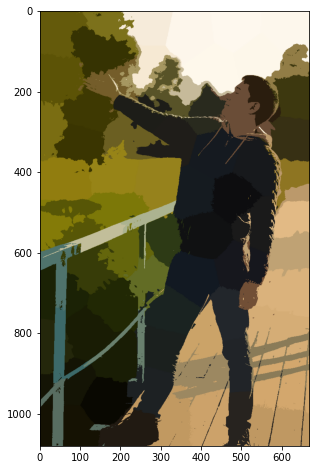

In [6]:
pix4_2 = np.zeros(pix4.shape, np.uint8)

for p, c in zip(data, db_clusters):
    pix4_2[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                          int(db.cluster_centers_[c, 3]), 
                          int(db.cluster_centers_[c, 4]))

plt.rcParams['figure.figsize'] = (12, 8)
ax = plt.subplot()
ax.imshow(pix4_2);

In [29]:
near = []
for i, c in enumerate(db.cluster_centers_):
    if (10 < c[2] < 35) and (10 < c[3] < 60) and (10 < c[4] < 60):
        print(i, c)
        near.append(i)

1 [837.64423923 301.34608619  27.43436675  32.92293316  30.00659631]
6 [461.5992603  478.31637345  13.45121951  13.78138745  15.04308277]
13 [634.54704162 494.78635463  22.04406908  23.80532226  29.52090214]
19 [321.78177739 327.58443079  31.79680031  29.10974539  25.759243  ]
26 [556.13560848 408.47990834  16.57926181  17.148621    18.88198707]
32 [939.37164831 273.82394513  29.16815631  33.35418832  35.31708584]
40 [530.5910124  536.34669421  26.87706612  26.75051653  26.14452479]
48 [249.71944828 252.59917241  29.61462069  29.63655172  24.28151724]
50 [451.35857439 380.64073452  21.62947971  27.53776286  32.83858229]
51 [385.23548751 537.08970505  23.50432087  25.71942514  28.61365771]
54 [879.21441558 490.72649351  33.96233766  36.63883117  40.50142857]
55 [1041.6969697   225.50710993   33.14249289   26.49593018   18.75355497]
58 [750.96347228 467.39127632  34.52986678  38.24237215  43.36946713]
60 [353.2256706  434.97445757  21.35200952  26.25057219  32.05154262]
63 [746.87632322 

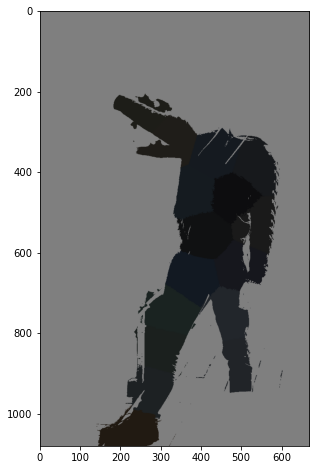

In [30]:
pix4_1 = np.zeros(pix4.shape, np.uint8)

for p, c in zip(data, db_clusters):
    if c in near:
        pix4_1[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))
    else: pix4_1[p[0], p[1]] = int(255/2)

plt.rcParams['figure.figsize'] = (12, 8)
ax = plt.subplot()
ax.imshow(pix4_1);